# Random Signals and LTI-Systems

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Auto-Correlation Function

The auto-correlation function (ACF) $\varphi_{yy}[\kappa]$ of the output signal of an LTI system $y[k] = \mathcal{H} \{ x[k] \}$ is derived. It is assumed that the input signal is a weakly stationary real-valued random process and that the LTI system has a real-valued impulse repsonse $h[k] \in \mathbb{R}$. 

Introducing the output relation $y[k] = h[k] * x[k]$ of an LTI system into the definition of the auto-correlation function and rearranging terms yields

\begin{align}
\varphi_{yy}[\kappa] &= E \{ y[k+\kappa] \cdot y[k] \} \\
&= E \left\{  \sum_{\mu = -\infty}^{\infty} h[\mu] \; x[k+\kappa-\mu] \cdot 
\sum_{\nu = -\infty}^{\infty} h[\nu] \; x[k-\nu] \right\} \\
&= \underbrace{h[\kappa] * h[-\kappa]}_{\varphi_{hh}[\kappa]} * \varphi_{xx}[\kappa]
\end{align}

where the deterministic function $\varphi_{hh}[\kappa]$ is frequently termed as *filter ACF*. This is related to the [link between ACF and convolution](../random_signals/correlation_functions.ipynb#Definition). The result above is known as the *Wiener-Lee theorem*. It states that the ACF of the output $\varphi_{yy}[\kappa]$ of an LTI system is given by the convolution of the input signal's ACF $\varphi_{xx}[\kappa]$ with the filter ACF $\varphi_{hh}[\kappa]$.

### Example

Let's assume that the input signal $x[k]$ of an LTI system with impulse response $h[k] = \text{rect}_N[k]$ is normal distributed white noise. Hence, $\varphi_{xx}[\kappa] = N_0\, \delta[\kappa]$ can be introduced into the Wiener-Lee theorem yielding

$$ \varphi_{yy}[\kappa] = N_0 \cdot (\text{rect}_N[\kappa] * \text{rect}_N[-\kappa]) $$

The example is evaluated numerically for $N_0 = 1$ and $N=5$ below.

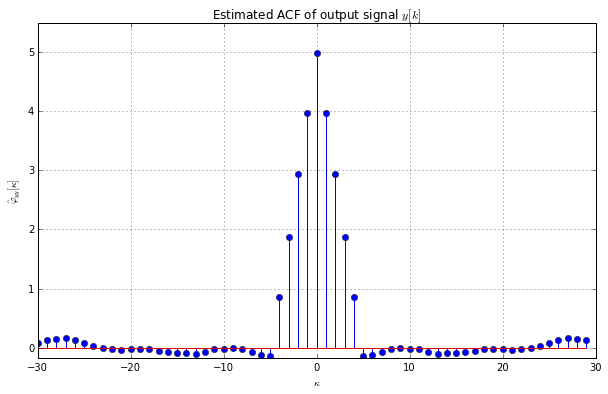

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

L = 10000  # number of samples
K = 30  # limit for lags in ACF

# generate input signal (white Gaussian noise)
x = np.random.normal(size=L)
# compute system response
y = np.convolve(x, [1, 1, 1, 1, 1], mode='full')

# compute and truncate ACF
acf = 1/len(y) * np.correlate(y, y, mode='full')
acf = acf[len(y)-K-1:len(y)+K-1]
kappa = np.arange(-K, K)

# plot ACF
plt.figure(figsize = (10, 6))
plt.stem(kappa, acf)
plt.title('Estimated ACF of output signal $y[k]$')
plt.ylabel(r'$\hat{\varphi}_{yy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([-K, K, 1.2*min(acf), 1.1*max(acf)]);
plt.grid()

**Exercise**

* Why is the estimated ACF $\hat{\varphi}_{yy}[\kappa]$ of the output signal not exactly equal to its theoretic result $\varphi_{yy}[\kappa]$ given above?
* Change the number of samples `L` and rerun the cell. What changes?

## Cross-Correlation Function

The cross-correlation functions (CCFs) $\varphi_{xy}[\kappa]$ and $\varphi_{yx}[\kappa]$ between the in- and output signal of an LTI system $y[k] = \mathcal{H} \{ x[k] \}$ are derived. As for the ACF it is assumed that the input signal originates from a weakly stationary real-valued random process and that the LTI system's impulse response is real-valued, i.e. $h[k] \in \mathbb{R}$.

Introducing the convolution into the definition of the CCF and rearranging the terms yields

\begin{align}
\varphi_{xy}[\kappa] &= E \{ x[k+\kappa] \cdot y[k] \} \\
&= E \left\{ x[k+\kappa] \cdot \sum_{\mu = -\infty}^{\infty} h[\mu] \; x[k-\mu] \right\} \\
&= \sum_{\mu = -\infty}^{\infty} h[\mu] \cdot E \{ x[k+\kappa] \cdot x[k-\mu] \} \\
&= h[-\kappa] * \varphi_{xx}[\kappa]
\end{align}

The CCF $\varphi_{xy}[\kappa]$ between in- and output is given as the time-reversed impulse response of the system convolved with the ACF of the input signal. 

The same calculus applied to the CCF between out- and input results in

$$ \varphi_{yx}[\kappa] = h[\kappa] * \varphi_{xx}[\kappa] $$

Hence, the CCF $\varphi_{yx}[\kappa]$ between out- and input is given as the impulse response of the system convolved with the ACF of the input signal.

## System Identification by Cross-Correlation

The CCFs of an LTI system play an important role in the measurement of the impulse response $h[k]$ of an unknown system. This is illustrated in the following.

Let's assume that the input signal $x[k]$ of the unknown LTI system is [white noise](../random_signals/white_noise.ipynb). The ACF of the input signal is then given as $\varphi_{xx}[\kappa] = N_0 \cdot \delta[\kappa]$. According to the relation derived above, the CCF between out- and input for this special choice of input signal gets

$$ \varphi_{yx}[\kappa] = N_0 \cdot h[\kappa] $$

Hence, the impulse response is derived by computing the CCF between out- and input, for white noise as input signal $x[k]$.

### Example

The application of the CCF for system identification is illustrated in the following

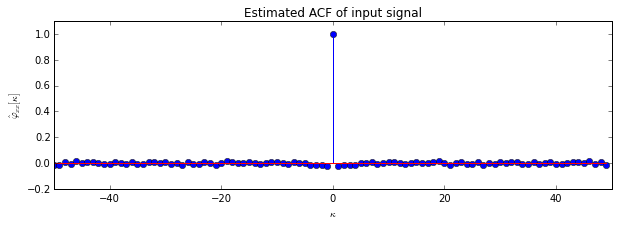

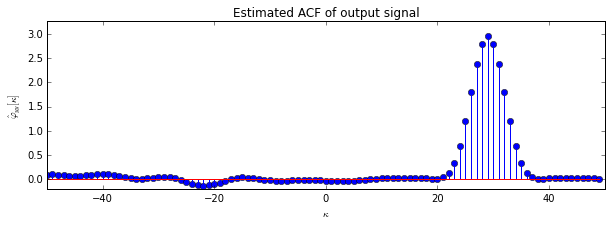

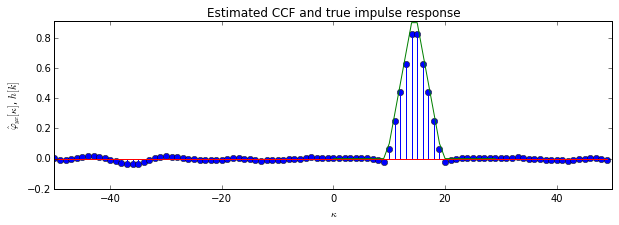

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


N = 10000  # number of samples for input signal
K = 50  # limit for lags in ACF

# generate input signal
x = np.random.normal(size=N)  # normally distributed (zero-mean, unit-variance) white noise
# impulse response of the system
h = np.concatenate((np.zeros(10), sig.triang(10), np.zeros(10)))
# output signal by convolution
y = np.convolve(h, x, mode='full')

# compute correlation functions
acfx = 1/len(x) * np.correlate(x, x, mode='full')
acfy = 1/len(y) * np.correlate(y, y, mode='full')
ccfyx = 1/len(y) * np.correlate(y, x, mode='full')

def plot_correlation_function(cf):
    cf = cf[N-K-1:N+K-1]
    kappa = np.arange(-len(cf)//2,len(cf)//2)
    plt.stem(kappa, cf)
    plt.xlabel(r'$\kappa$')
    plt.axis([-K, K, -0.2, 1.1*max(cf)])

# plot ACFs and CCF
plt.rc('figure', figsize=(10, 3))
plt.figure()
plot_correlation_function(acfx)
plt.title('Estimated ACF of input signal')
plt.ylabel(r'$\hat{\varphi}_{xx}[\kappa]$')


plt.figure()
plot_correlation_function(acfy)
plt.title('Estimated ACF of output signal')
plt.ylabel(r'$\hat{\varphi}_{yy}[\kappa]$')

plt.figure()
plt.hold(True)
plot_correlation_function(ccfyx)
plt.plot(np.arange(len(h)), h, 'g-')
plt.title('Estimated CCF and true impulse response')
plt.ylabel(r'$\hat{\varphi}_{yx}[\kappa]$, $h[k]$');

**Exercise**

* Why is the estimated CCF $\hat{\varphi}_{yx}[k]$ not exactly equal to the impulse response $h[k]$ of the system?
* What changes if you change the number of samples `N` of the input signal?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>